In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import glob
import matplotlib.pyplot as plt

In [3]:
dataset_path = 'dataset-resized'
# os.listdir(dataset_path)

In [4]:
img_list = glob.glob(os.path.join(dataset_path,'*/*.jpg'))

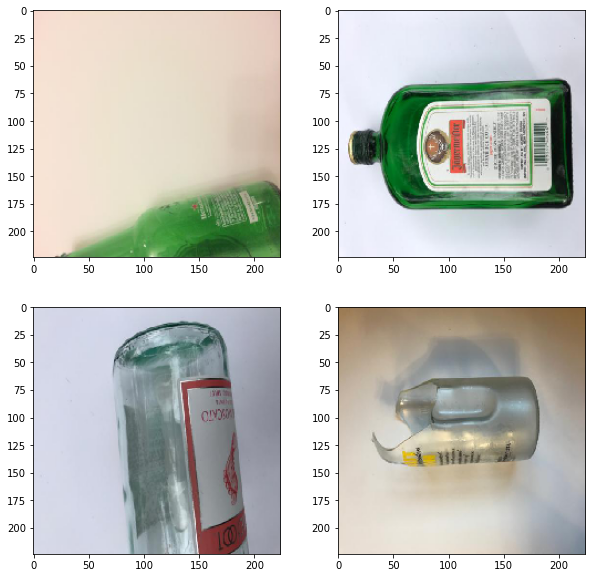

In [5]:
plt.figure(figsize=(10,10))
for i in range(0,4):
  img = tf.keras.preprocessing.image.load_img(img_list[i+1],target_size=(224,224))
  img = tf.keras.preprocessing.image.img_to_array(img,dtype=np.uint8)
  plt.subplot(2,2,i+1)
  plt.imshow(img)

In [6]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [7]:
train_generator = train_generator.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

Found 1789 images belonging to 4 classes.


In [8]:
test_generator = test_generator.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 396 images belonging to 4 classes.


In [9]:
model = tf.keras.applications.ResNet50V2(input_shape=(224,224,3),include_top=False, weights='imagenet')

In [10]:
input_layer = model.layers[0].input
inputs= model.layers[-1].output
x = tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4,activation='softmax')(x)
myModel = tf.keras.Model(input_layer,x)

In [11]:
model.trainable=False

In [12]:
myModel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
myModel.fit(train_generator,validation_data=test_generator,epochs=20,batch_size=32)

Epoch 1/20
112/112 [==============================] - 102s 806ms/step - loss: 2.7003 - accuracy: 0.5925 - val_loss: 0.4650 - val_accuracy: 0.8131
Epoch 2/20
112/112 [==============================] - 80s 711ms/step - loss: 0.5270 - accuracy: 0.7955 - val_loss: 0.3829 - val_accuracy: 0.8662
Epoch 3/20
112/112 [==============================] - 83s 743ms/step - loss: 0.3914 - accuracy: 0.8526 - val_loss: 0.3977 - val_accuracy: 0.8409
Epoch 4/20
112/112 [==============================] - 82s 730ms/step - loss: 0.3613 - accuracy: 0.8730 - val_loss: 0.3154 - val_accuracy: 0.8864
Epoch 5/20
112/112 [==============================] - 79s 703ms/step - loss: 0.3748 - accuracy: 0.8712 - val_loss: 0.2913 - val_accuracy: 0.8864
Epoch 6/20
112/112 [==============================] - 80s 717ms/step - loss: 0.2779 - accuracy: 0.8988 - val_loss: 0.2675 - val_accuracy: 0.8939
Epoch 7/20
112/112 [==============================] - 79s 707ms/step - loss: 0.2735 - accuracy: 0.9021 - val_loss: 0.2636 - val_a

In [14]:
myModel.save('./results/model.h5')

In [15]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(
    rescale=1. / 255, validation_split=0.1)

validation_generator = test_datagen.flow_from_directory(
    dataset_path, target_size=(224, 224), batch_size=16,
    class_mode='categorical', subset='validation', seed=0)

Found 198 images belonging to 4 classes.


In [16]:
train_datagen = ImageDataGenerator(
    rescale=1. / 225, shear_range=0.1, zoom_range=0.1,
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,
    vertical_flip=True, validation_split=0.1)
train_generator = train_datagen.flow_from_directory(
    dataset_path, target_size=(224, 224), batch_size=16,
    class_mode='categorical', subset='training', seed=0)
labels = (train_generator.class_indices)

print(labels)
labels = dict((v, k) for k, v in labels.items())

print(labels)

Found 1789 images belonging to 4 classes.
{'glass': 0, 'metal': 1, 'paper': 2, 'plastic': 3}
{0: 'glass', 1: 'metal', 2: 'paper', 3: 'plastic'}


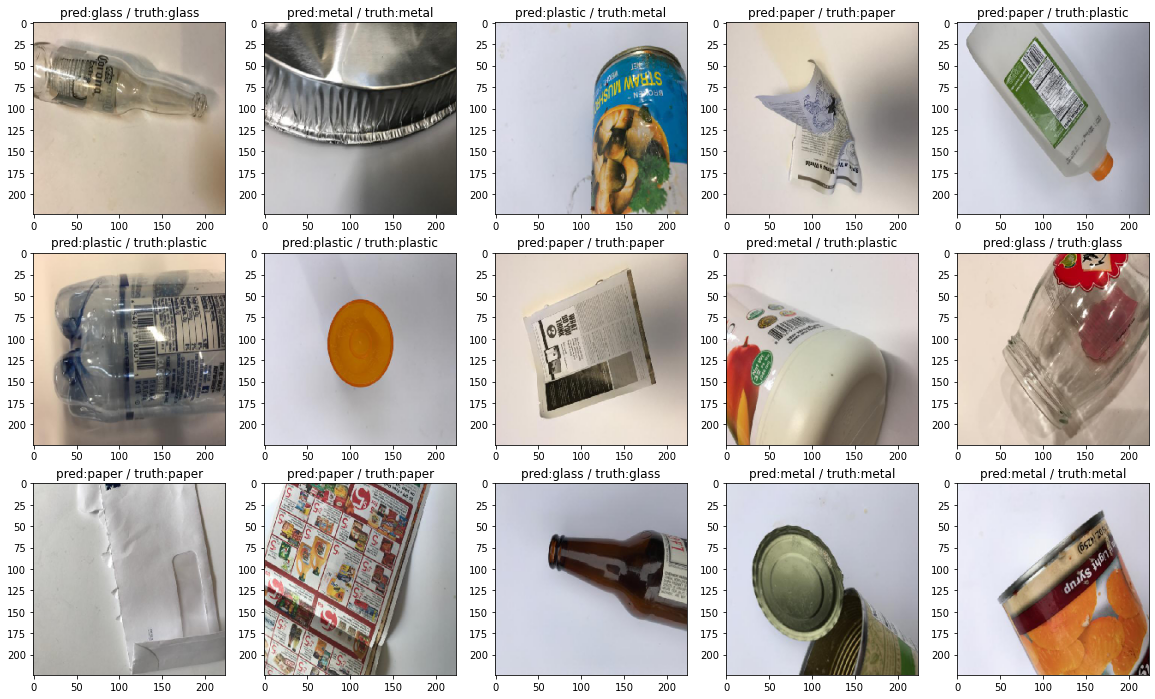

In [17]:
test_x, test_y = validation_generator.__getitem__(8)

preds = myModel.predict(test_x)

plt.figure(figsize=(20, 12))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])
plt.savefig('./results/result.png')